In [153]:
import matplotlib.pyplot as plt
import matplotlib_inline
import numpy as np

In [191]:
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

plt.rcParams["figure.dpi"] = 1200
plt.rcParams["font.family"] = "CMU Serif"
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["axes.axisbelow"] = True

In [155]:
num_streams = 50
num_rounds = 100
timeseries_length = 1000
changepoint = 200

x = np.random.normal(size=[num_streams, timeseries_length])
x[:, changepoint:] = np.exp(x[:, changepoint:]) - np.exp(-0.5)
e_processes = np.zeros((num_streams, timeseries_length))
e_detector = np.zeros((num_streams, timeseries_length))

for t in range(timeseries_length):
    for k in range(num_streams):
        curr_obs = x[k, t]
        e_processes[k, t] = 1
        e_processes[k, :] += np.sign(curr_obs) * (e_processes[k, :] > 0)

        e_detector[k, t] = np.sum(e_processes[k, :])

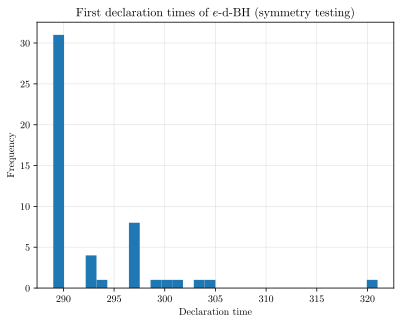

In [195]:
alpha = 0.001

first_rejection_times = np.zeros(num_streams)
for t in range(timeseries_length):
    order_statistics = sorted(
        zip(e_detector[:, t], range(num_streams)), key=lambda x: -x[0]
    )

    k_star = max(
        (
            k + 1
            for k in range(num_streams)
            if (k + 1) * order_statistics[k][0] / num_streams >= 1 / alpha
        ),
        default=0,
    )

    for i in range(k_star):
        if first_rejection_times[order_statistics[i][1]] == 0:
            first_rejection_times[order_statistics[i][1]] = t + 1

plt.hist(first_rejection_times, bins=30)
plt.xlabel("Declaration time")
plt.ylabel("Frequency")
plt.title("First declaration times of $e$-d-BH (symmetry testing)")
plt.grid(alpha=0.3)
plt.savefig("edbh-symmetry.png", bbox_inches="tight")

plt.show()

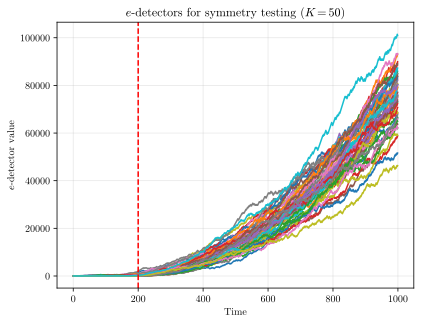

In [ ]:
plt.plot(e_detector.T)
plt.xlabel("Time")
plt.ylabel("$e$-detector value")

plt.title("$e$-detectors for symmetry testing ($K = 50$)")
plt.axvline(changepoint, color="red", linestyle="--")
plt.grid(alpha=0.3)

plt.savefig("e-detectors-symmetry.png", bbox_inches="tight")

plt.show()

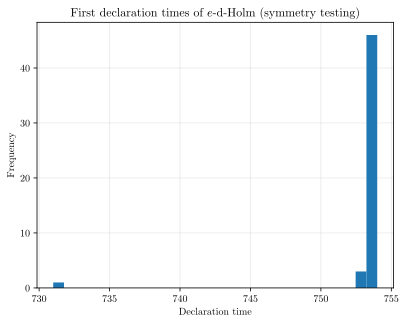

In [194]:
alpha = 0.001

first_rejection_times = np.zeros(num_streams)
for t in range(timeseries_length):
    order_statistics = sorted(
        zip(e_detector[:, t], range(num_streams)), key=lambda x: -x[0]
    )

    k_star = max(
        (
            k
            for k in range(num_streams + 1)
            if all(
                order_statistics[i][0] / (num_streams - i) >= 1 / alpha
                for i in range(k)
            )
        ),
        default=0,
    )

    for i in range(k_star):
        if first_rejection_times[order_statistics[i][1]] == 0:
            first_rejection_times[order_statistics[i][1]] = t + 1

plt.hist(first_rejection_times, bins=30)
plt.xlabel("Declaration time")
plt.ylabel("Frequency")
plt.title("First declaration times of $e$-d-Holm (symmetry testing)")
plt.grid(alpha=0.3)

plt.savefig("edholm-symmetry.png", bbox_inches="tight")

plt.show()